# Period poverty research in Bardejov
## Cross-Analysis: Pre vs Post Installation of Menstrual Products

#### Imports

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns




#### Load data

In [2]:
# Load both datasets
pre_data = pd.read_csv('pre_installation_data.csv')
after_data = pd.read_csv('after_installation_data.csv')

# Clean leading and trailing spaces
pre_data = pre_data.map(lambda x: x.strip() if isinstance(x, str) else x)
after_data = after_data.map(lambda x: x.strip() if isinstance(x, str) else x)

# Filter out elementary school students from pre-installation data
pre_data = pre_data[pre_data['Akú školu navštevujete?'] != 'Základnú školu']

print(f"Pre-installation respondents (excluding elementary school): {len(pre_data)}")
print(f"Post-installation respondents: {len(after_data)}")

Pre-installation respondents (excluding elementary school): 95
Post-installation respondents: 79


## Setup

In [3]:
# Common mappings
yes_no_map = {
    'Áno': 'Yes', 'Ano': 'Yes',
    'Nie': 'No',
    'Niekedy': 'Sometimes',
    'Nechcem odpovedať': "Don't want to answer"
}

# Color palette
PRIMARY_COLOR = '#1a4a6e'
SECONDARY_COLOR = '#6baed6'
ACCENT_COLOR = '#fffacd'
COLORS_COMPARISON = ['#2171b5', '#6baed6']  # Pre, Post

## Sample Overview

In [4]:
# Summary statistics
print("=" * 50)
print("SAMPLE OVERVIEW")
print("=" * 50)
print(f"\nPre-installation survey (April-May 2025): n = {len(pre_data)}")
print(f"Post-installation survey (June-July 2025): n = {len(after_data)}")

# Pre-installation age
print(f"\nPre-installation age range: {pre_data['Aký je Váš vek?'].min()}-{pre_data['Aký je Váš vek?'].max()} years")
print(f"Pre-installation average age: {pre_data['Aký je Váš vek?'].mean():.1f} years")

# Post-installation age distribution
print("\nPost-installation age distribution:")
for age, count in after_data['Vek'].value_counts().items():
    if pd.notna(age):
        print(f"  {age}: {count} ({count/len(after_data)*100:.1f}%)")

SAMPLE OVERVIEW

Pre-installation survey (April-May 2025): n = 95
Post-installation survey (June-July 2025): n = 79

Pre-installation age range: 15-19 years
Pre-installation average age: 16.9 years

Post-installation age distribution:
  16 - 18 rokov: 49 (62.0%)
  Viac ako 18 rokov: 25 (31.6%)


## 1. School Absence Comparison
Direct comparison of school absence rates due to menstruation before and after the installation of free menstrual products.

In [5]:
# Pre-installation: "Vynechali ste niekedy školu kvôli menštruácii?"
# Post-installation: "Chýbala si niekedy v škole kvôli menštruácii?"

pre_absence = pre_data['Vynechali ste niekedy školu kvôli menštruácii?'].map(yes_no_map).value_counts(normalize=True) * 100
post_absence = after_data['Chýbala si niekedy v škole kvôli menštruácii?'].map(yes_no_map).value_counts(normalize=True) * 100

# Get values for comparison
pre_yes = pre_absence.get('Yes', 0)
post_yes = post_absence.get('Yes', 0)
pre_no = pre_absence.get('No', 0)
post_no = post_absence.get('No', 0)

print("School Absence Due to Menstruation:")
print(f"\nPre-installation (n={len(pre_data)}):")
print(f"  Yes: {pre_yes:.1f}%")
print(f"  No: {pre_no:.1f}%")
print(f"\nPost-installation (n={len(after_data)}):")
print(f"  Yes: {post_yes:.1f}%")
print(f"  No: {post_no:.1f}%")
print(f"\nChange: {post_yes - pre_yes:+.1f} percentage points")

School Absence Due to Menstruation:

Pre-installation (n=95):
  Yes: 63.2%
  No: 36.8%

Post-installation (n=79):
  Yes: 53.2%
  No: 45.6%

Change: -10.0 percentage points


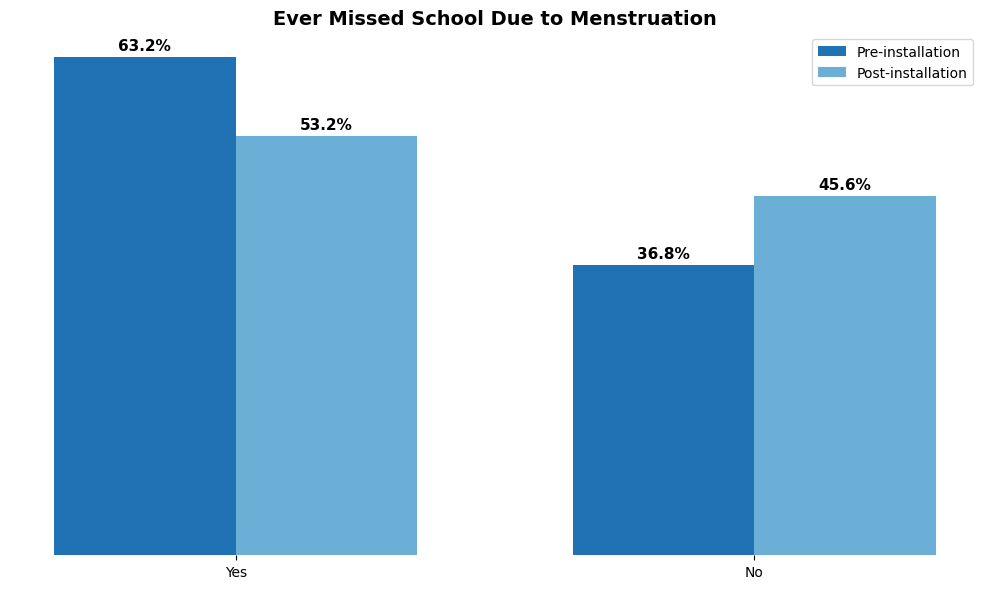

In [6]:
# Visualization: School absence comparison
fig, ax = plt.subplots(figsize=(10, 6))

categories = ['Yes', 'No']
pre_values = [pre_yes, pre_no]
post_values = [post_yes, post_no]

x = np.arange(len(categories))
width = 0.35

bars1 = ax.bar(x - width/2, pre_values, width, label='Pre-installation', color=COLORS_COMPARISON[0])
bars2 = ax.bar(x + width/2, post_values, width, label='Post-installation', color=COLORS_COMPARISON[1])

# Add value labels
ax.bar_label(bars1, padding=3, labels=[f'{v:.1f}%' for v in pre_values], fontsize=11, fontweight='bold')
ax.bar_label(bars2, padding=3, labels=[f'{v:.1f}%' for v in post_values], fontsize=11, fontweight='bold')

ax.set_ylabel('Percentage of respondents')
ax.set_title('Ever Missed School Due to Menstruation', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

# Add annotation for change
change = post_yes - pre_yes
ax.annotate(f'Change: {change:+.1f}pp', 
            xy=(0, max(pre_yes, post_yes) + 5), 
            fontsize=12, ha='center',
            color='green' if change < 0 else 'red')

for spine in ax.spines.values():
    spine.set_visible(False)
ax.yaxis.set_visible(False)

plt.tight_layout()
plt.show()

## 2. Pre-Existing Challenges vs Project Impact
Analyzing how the project addressed the challenges identified in the pre-installation survey.

In [7]:
# Pre-installation challenges
print("=" * 60)
print("PRE-EXISTING CHALLENGES (Before Project)")
print("=" * 60)

# Couldn't afford products
afford_counts = pre_data['Stalo sa vám, že ste si kvôli finančným dôvodom nemohli dovoliť kúpiť menštruačné pomôcky?'].map(yes_no_map).value_counts()
afford_yes = afford_counts.get('Yes', 0)
afford_sometimes = afford_counts.get('Sometimes', 0)
afford_total = afford_yes + afford_sometimes
print(f"\n1. Couldn't afford menstrual products:")
print(f"   Yes: {afford_yes} ({afford_yes/len(pre_data)*100:.1f}%)")
print(f"   Sometimes: {afford_sometimes} ({afford_sometimes/len(pre_data)*100:.1f}%)")
print(f"   Total affected: {afford_total} ({afford_total/len(pre_data)*100:.1f}%)")

# Embarrassed buying products
embarrassed_counts = pre_data['Cítili ste sa niekedy trápne pri nákupe menštruačných pomôcok?'].map(yes_no_map).value_counts()
embarrassed_yes = embarrassed_counts.get('Yes', 0)
print(f"\n2. Felt embarrassed buying menstrual products:")
print(f"   Yes: {embarrassed_yes} ({embarrassed_yes/len(pre_data)*100:.1f}%)")

# Stressed changing outside home
stressed_counts = pre_data['Je pre vás výmena vložky alebo tampónu stresujúca, ak ste mimo domova?'].map(yes_no_map).value_counts()
stressed_yes = stressed_counts.get('Yes', 0)
stressed_sometimes = stressed_counts.get('Sometimes', 0)
print(f"\n3. Stressed changing products outside home:")
print(f"   Yes: {stressed_yes} ({stressed_yes/len(pre_data)*100:.1f}%)")
print(f"   Sometimes: {stressed_sometimes} ({stressed_sometimes/len(pre_data)*100:.1f}%)")

PRE-EXISTING CHALLENGES (Before Project)

1. Couldn't afford menstrual products:
   Yes: 9 (9.5%)
   Sometimes: 0 (0.0%)
   Total affected: 9 (9.5%)

2. Felt embarrassed buying menstrual products:
   Yes: 44 (46.3%)

3. Stressed changing products outside home:
   Yes: 26 (27.4%)
   Sometimes: 27 (28.4%)


In [8]:
# Post-installation project impact
print("=" * 60)
print("PROJECT IMPACT (After Installation)")
print("=" * 60)

# Feel more confident
confident = after_data['Cítiš sa istejšie, keď vieš, že máš v škole k dispozícii hygienické pomôcky?'].value_counts()
confident_yes = confident.get('Ano', 0)
print(f"\n1. Feel more confident with products available at school:")
print(f"   Yes: {confident_yes} ({confident_yes/len(after_data)*100:.1f}%)")

# How it helped
print(f"\n2. How the project helped (specific benefits):")
help_col = 'Ak áno, pomohlo ti to vyriešiť niektorý konkrétny problém?'
help_map = {
    'Cítila som sa pokojnejšie a bezpečnejšie': 'Felt calmer and safer',
    'Pomohlo mi to vyhnúť sa pretečeniu/nepríjemnosťam': 'Avoided leaking/discomfort',
    'Nemala som pri sebe pomôcku a pomohlo mi to prekonať stres': 'Overcame stress (no products on hand)',
    'Pomohlo mi to s infekciami alebo zdravotným diskomfortom': 'Helped with health issues',
    'Nepomohlo / nič z toho sa ma netýka': "Didn't help / N/A",
    'Iné': 'Other'
}
help_counts = after_data[help_col].map(help_map).value_counts()
for answer, count in help_counts.items():
    if pd.notna(answer):
        print(f"   {answer}: {count} ({count/len(after_data)*100:.1f}%)")

# Psychological benefit
psych = after_data['Cítila si sa vďaka projektu psychicky lepšie?'].str.capitalize().value_counts()
psych_yes = psych.get('Ano', 0)
psych_partial = psych.get('Čiastočne', 0)
print(f"\n3. Felt psychologically better due to project:")
print(f"   Yes: {psych_yes} ({psych_yes/len(after_data)*100:.1f}%)")
print(f"   Partially: {psych_partial} ({psych_partial/len(after_data)*100:.1f}%)")
print(f"   Total positive: {psych_yes + psych_partial} ({(psych_yes + psych_partial)/len(after_data)*100:.1f}%)")

PROJECT IMPACT (After Installation)

1. Feel more confident with products available at school:
   Yes: 63 (79.7%)

2. How the project helped (specific benefits):
   Felt calmer and safer: 20 (25.3%)
   Didn't help / N/A: 18 (22.8%)
   Avoided leaking/discomfort: 17 (21.5%)
   Overcame stress (no products on hand): 9 (11.4%)
   Other: 2 (2.5%)
   Helped with health issues: 1 (1.3%)

3. Felt psychologically better due to project:
   Yes: 28 (35.4%)
   Partially: 21 (26.6%)
   Total positive: 49 (62.0%)


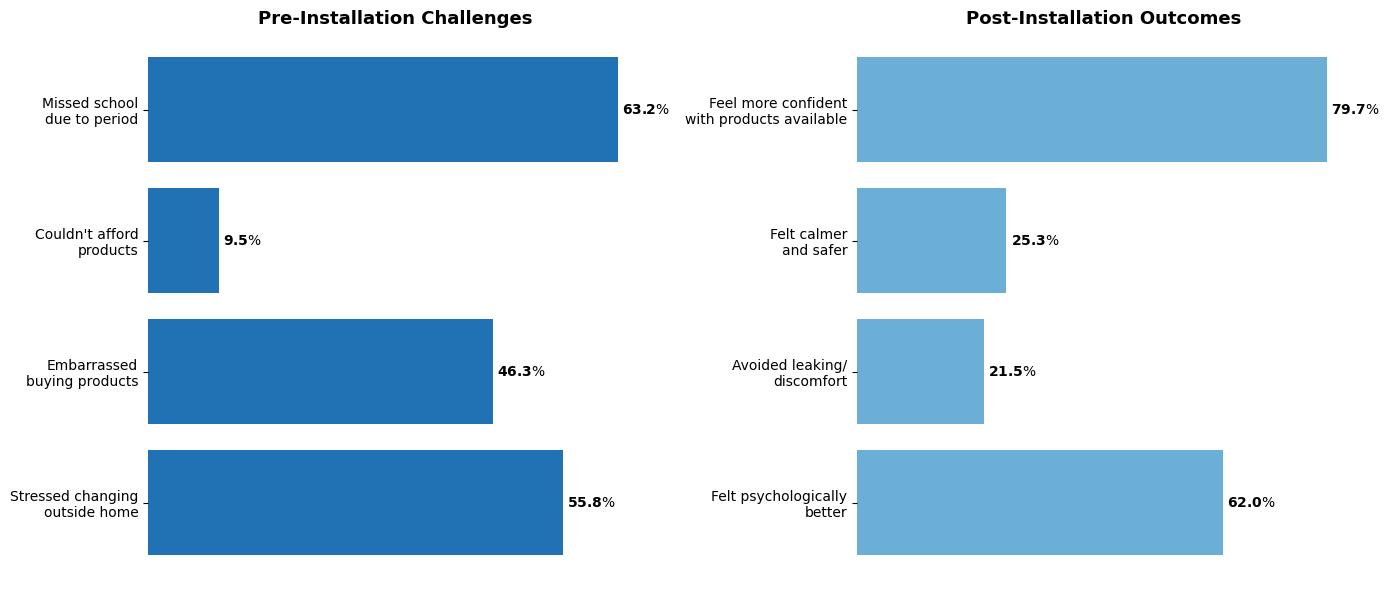

In [9]:
# Visualization: Pre-existing challenges vs Project solutions
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Left: Pre-existing challenges
ax1 = axes[0]
challenges = ['Missed school\ndue to period', "Couldn't afford\nproducts", 'Embarrassed\nbuying products', 'Stressed changing\noutside home']
challenge_values = [
    pre_yes,
    (afford_yes + afford_sometimes) / len(pre_data) * 100,
    embarrassed_yes / len(pre_data) * 100,
    (stressed_yes + stressed_sometimes) / len(pre_data) * 100
]

bars1 = ax1.barh(challenges, challenge_values, color=COLORS_COMPARISON[0])
ax1.bar_label(bars1, padding=3, labels=[f'$\\mathbf{{{v:.1f}}}$%' for v in challenge_values])
ax1.set_title('Pre-Installation Challenges', fontsize=13, fontweight='bold')
ax1.set_xlabel('Percentage of respondents')
ax1.invert_yaxis()
for spine in ax1.spines.values():
    spine.set_visible(False)
ax1.xaxis.set_visible(False)

# Right: Project impact/solutions
ax2 = axes[1]

# Calculate positive outcomes
felt_confident = confident_yes / len(after_data) * 100
felt_calmer = help_counts.get('Felt calmer and safer', 0) / len(after_data) * 100
avoided_leaking = help_counts.get('Avoided leaking/discomfort', 0) / len(after_data) * 100
overcame_stress = help_counts.get('Overcame stress (no products on hand)', 0) / len(after_data) * 100
psych_positive = (psych_yes + psych_partial) / len(after_data) * 100

solutions = ['Feel more confident\nwith products available', 'Felt calmer\nand safer', 'Avoided leaking/\ndiscomfort', 'Felt psychologically\nbetter']
solution_values = [felt_confident, felt_calmer, avoided_leaking, psych_positive]

bars2 = ax2.barh(solutions, solution_values, color=COLORS_COMPARISON[1])
ax2.bar_label(bars2, padding=3, labels=[f'$\\mathbf{{{v:.1f}}}$%' for v in solution_values])
ax2.set_title('Post-Installation Outcomes', fontsize=13, fontweight='bold')
ax2.set_xlabel('Percentage of respondents')
ax2.invert_yaxis()
for spine in ax2.spines.values():
    spine.set_visible(False)
ax2.xaxis.set_visible(False)

plt.tight_layout()
plt.show()

## 3. Project Utilization and Satisfaction

In [10]:
# Project utilization statistics
print("=" * 60)
print("PROJECT UTILIZATION")
print("=" * 60)

# Used free products
usage_col = 'Využili ste niekedy menštruačné pomôcky, ktoré boli v rámci projektu zdarma k dispozícii na škole?'
usage = after_data[usage_col].value_counts()
used_multiple = usage.get('Ano, viackrát', 0)
used_once = usage.get('Ano, raz', 0)
total_used = used_multiple + used_once
knew_not_needed = usage.get('Vedela som o nich, ale nepotrebovala som ich', 0)

print(f"\nUsed free menstrual products:")
print(f"  Multiple times: {used_multiple} ({used_multiple/len(after_data)*100:.1f}%)")
print(f"  Once: {used_once} ({used_once/len(after_data)*100:.1f}%)")
print(f"  Total who used: {total_used} ({total_used/len(after_data)*100:.1f}%)")
print(f"  Knew about but didn't need: {knew_not_needed} ({knew_not_needed/len(after_data)*100:.1f}%)")

# Awareness
didnt_know = usage.get('Nevedela som, že sú dostupné', 0)
awareness = len(after_data) - didnt_know
print(f"\nAwareness of available products: {awareness} ({awareness/len(after_data)*100:.1f}%)")

PROJECT UTILIZATION

Used free menstrual products:
  Multiple times: 24 (30.4%)
  Once: 14 (17.7%)
  Total who used: 38 (48.1%)
  Knew about but didn't need: 21 (26.6%)

Awareness of available products: 78 (98.7%)


In [11]:
# Satisfaction and continuation desire
print("\n" + "=" * 60)
print("PROJECT SATISFACTION")
print("=" * 60)

# Project useful
useful = after_data['Mala si pocit, že projekt bol pre dievčatá užitočný?'].value_counts()
useful_yes = useful.get('Ano', 0)
print(f"\nProject was useful for girls:")
print(f"  Yes: {useful_yes} ({useful_yes/len(after_data)*100:.1f}%)")

# Want to continue
continue_proj = after_data['Chcela by si, aby sa poskytovanie vložiek na škole zachovalo aj naďalej?'].value_counts()
continue_yes = continue_proj.get('Ano', 0)
print(f"\nWant project to continue:")
print(f"  Yes: {continue_yes} ({continue_yes/len(after_data)*100:.1f}%)")

# Want in future years
future = after_data['Chcela by si, aby boli vložky zadarmo poskytované aj v ďalších školských rokoch?'].value_counts()
future_yes = future.get('Ano, určite', 0)
future_maybe = future.get('Možno', 0)
print(f"\nWant free products in future years:")
print(f"  Definitely yes: {future_yes} ({future_yes/len(after_data)*100:.1f}%)")
print(f"  Maybe: {future_maybe} ({future_maybe/len(after_data)*100:.1f}%)")


PROJECT SATISFACTION

Project was useful for girls:
  Yes: 70 (88.6%)

Want project to continue:
  Yes: 68 (86.1%)

Want free products in future years:
  Definitely yes: 69 (87.3%)
  Maybe: 10 (12.7%)


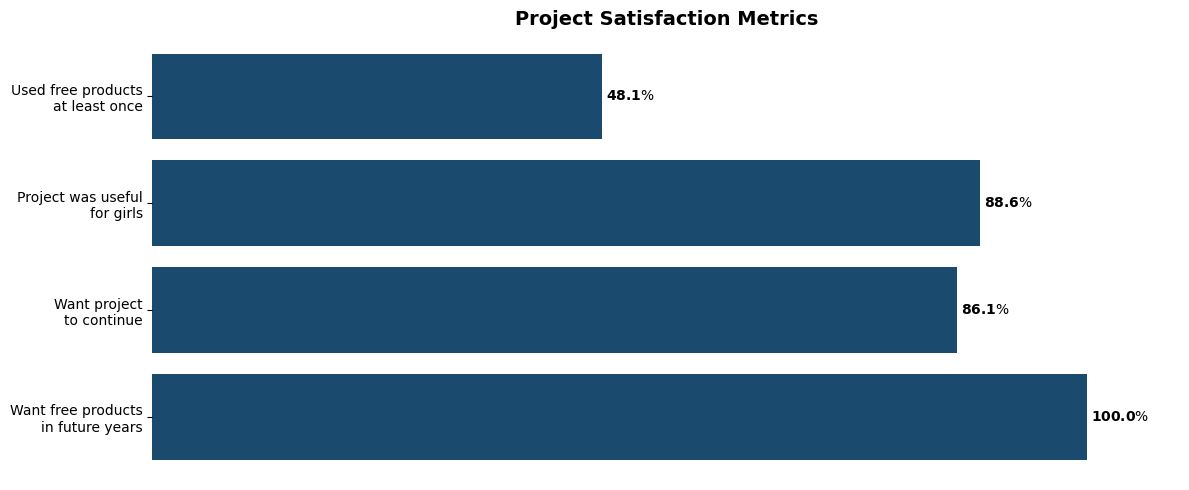

In [12]:
# Visualization: Project satisfaction metrics
fig, ax = plt.subplots(figsize=(12, 5))

metrics = [
    'Used free products\nat least once',
    'Project was useful\nfor girls',
    'Want project\nto continue',
    'Want free products\nin future years'
]

values = [
    total_used / len(after_data) * 100,
    useful_yes / len(after_data) * 100,
    continue_yes / len(after_data) * 100,
    (future_yes + future_maybe) / len(after_data) * 100
]

bars = ax.barh(metrics, values, color=PRIMARY_COLOR)
ax.bar_label(bars, padding=3, labels=[f'$\\mathbf{{{v:.1f}}}$%' for v in values])

ax.set_title('Project Satisfaction Metrics', fontsize=14, fontweight='bold')
ax.set_xlim(0, 110)
ax.invert_yaxis()

for spine in ax.spines.values():
    spine.set_visible(False)
ax.xaxis.set_visible(False)

plt.tight_layout()
plt.show()

## 4. Impact on Openness About Menstruation

In [13]:
# Pre-installation: Difficulty communicating about intimate topics
print("=" * 60)
print("COMMUNICATION AND OPENNESS")
print("=" * 60)

# Pre: Difficulty communicating with doctor
comm_difficulty = pre_data['Je pre vás ťažké komunikovať o intímnych témach so svojím lekárom?'].map(yes_no_map).value_counts()
comm_yes = comm_difficulty.get('Yes', 0)
comm_sometimes = comm_difficulty.get('Sometimes', 0)
print(f"\nPre-installation - Difficulty communicating about intimate topics with doctor:")
print(f"  Yes: {comm_yes} ({comm_yes/len(pre_data)*100:.1f}%)")
print(f"  Sometimes: {comm_sometimes} ({comm_sometimes/len(pre_data)*100:.1f}%)")

# Post: Project contributed to more open discussion
discussion = after_data['Myslíš si, že projekt prispel k tomu, aby sa o menštruácii v škole hovorilo otvorenejšie a prirodzenejšie?'].value_counts()
disc_definitely = discussion.get('Určite ano', 0)
disc_rather = discussion.get('Skôr ano', 0)
print(f"\nPost-installation - Project contributed to more open discussion at school:")
print(f"  Definitely yes: {disc_definitely} ({disc_definitely/len(after_data)*100:.1f}%)")
print(f"  Rather yes: {disc_rather} ({disc_rather/len(after_data)*100:.1f}%)")
print(f"  Total positive: {disc_definitely + disc_rather} ({(disc_definitely + disc_rather)/len(after_data)*100:.1f}%)")

COMMUNICATION AND OPENNESS

Pre-installation - Difficulty communicating about intimate topics with doctor:
  Yes: 26 (27.4%)
  Sometimes: 26 (27.4%)

Post-installation - Project contributed to more open discussion at school:
  Definitely yes: 44 (55.7%)
  Rather yes: 26 (32.9%)
  Total positive: 70 (88.6%)


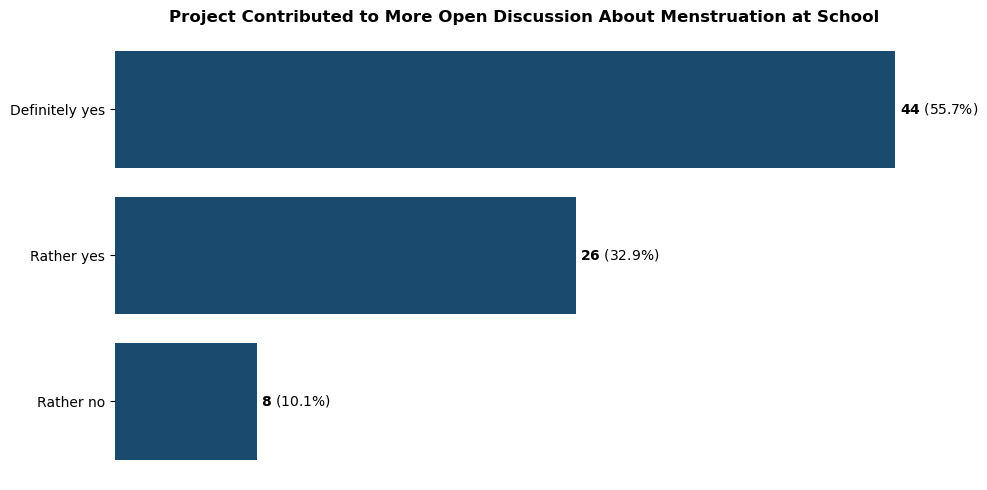

In [14]:
# Visualization: Openness comparison
fig, ax = plt.subplots(figsize=(10, 5))

discussion_map = {
    'Určite ano': 'Definitely yes',
    'Skôr ano': 'Rather yes',
    'Skôr nie': 'Rather no',
    'Určite nie': 'Definitely no'
}

disc_data = after_data['Myslíš si, že projekt prispel k tomu, aby sa o menštruácii v škole hovorilo otvorenejšie a prirodzenejšie?'].map(discussion_map).value_counts()
order = ['Definitely yes', 'Rather yes', 'Rather no', 'Definitely no']
disc_data = disc_data.reindex([x for x in order if x in disc_data.index])

bars = ax.barh(disc_data.index, disc_data.values, color=PRIMARY_COLOR)
total = len(after_data)
ax.bar_label(bars, padding=3, labels=[f'$\\mathbf{{{v}}}$ ({v/total*100:.1f}%)' for v in disc_data.values])

ax.set_title('Project Contributed to More Open Discussion About Menstruation at School', fontsize=12, fontweight='bold')
ax.invert_yaxis()

for spine in ax.spines.values():
    spine.set_visible(False)
ax.xaxis.set_visible(False)

plt.tight_layout()
plt.show()

## 5. Information and Education Impact

In [15]:
# Pre-installation: Information preparedness before first period
print("=" * 60)
print("INFORMATION AND EDUCATION")
print("=" * 60)

info_prep_col = 'Mali ste pred prvou menštruáciou dostatok informácií o tom, čo menštruácia znamená a ako sa na ňu pripraviť?'
info_prep = pre_data[info_prep_col].value_counts()

had_all = info_prep.get('Áno, mala som všetky potrebné informácie', 0)
had_partial = info_prep.get('Mala som len čiastočné informácie', 0)
had_none = info_prep.get('Nemala som žiadne informácie', 0)

print(f"\nPre-installation - Information before first period:")
print(f"  Had all necessary information: {had_all} ({had_all/len(pre_data)*100:.1f}%)")
print(f"  Had only partial information: {had_partial} ({had_partial/len(pre_data)*100:.1f}%)")
print(f"  Had no information: {had_none} ({had_none/len(pre_data)*100:.1f}%)")
print(f"  Total with insufficient info: {had_partial + had_none} ({(had_partial + had_none)/len(pre_data)*100:.1f}%)")

# Post: Lectures helped
lectures_col = 'V mesiaci december 2025, sa prebehla vo Vašej škola séria prednášok, na tému: Dospievanie, menštruácia a menštruačná chudoba. Prednášali ti: My mami n.o., Zdravé regióny, DM Drogerie a ČLOVEK v ohrození n.o. Pomohli ti tieto aktivity získať nové informácie alebo iný pohľad na túto tému?'
lectures = after_data[lectures_col].value_counts()
lectures_def_yes = lectures.get('Určite ano', 0)
lectures_rather_yes = lectures.get('Skôr ano', 0)

print(f"\nPost-installation - Lectures helped gain new information:")
print(f"  Definitely yes: {lectures_def_yes} ({lectures_def_yes/len(after_data)*100:.1f}%)")
print(f"  Rather yes: {lectures_rather_yes} ({lectures_rather_yes/len(after_data)*100:.1f}%)")
print(f"  Total positive: {lectures_def_yes + lectures_rather_yes} ({(lectures_def_yes + lectures_rather_yes)/len(after_data)*100:.1f}%)")

INFORMATION AND EDUCATION

Pre-installation - Information before first period:
  Had all necessary information: 57 (60.0%)
  Had only partial information: 30 (31.6%)
  Had no information: 8 (8.4%)
  Total with insufficient info: 38 (40.0%)

Post-installation - Lectures helped gain new information:
  Definitely yes: 29 (36.7%)
  Rather yes: 23 (29.1%)
  Total positive: 52 (65.8%)


## 6. Summary: Key Findings

In [16]:
print("=" * 70)
print("CROSS-ANALYSIS SUMMARY: KEY FINDINGS")
print("=" * 70)

print(f"\n{'SCHOOL ABSENCE':=^70}")
print(f"Pre-installation: {pre_yes:.1f}% missed school due to menstruation")
print(f"Post-installation: {post_yes:.1f}% missed school due to menstruation")
print(f"Change: {post_yes - pre_yes:+.1f} percentage points")

print(f"\n{'PRE-EXISTING CHALLENGES ADDRESSED':=^70}")
print(f"Before: {(afford_yes + afford_sometimes)/len(pre_data)*100:.1f}% couldn't afford products")
print(f"After: {total_used/len(after_data)*100:.1f}% used free products at school")
print(f"After: {felt_confident:.1f}% feel more confident with products available")

print(f"\n{'PSYCHOLOGICAL IMPACT':=^70}")
print(f"Before: {(stressed_yes + stressed_sometimes)/len(pre_data)*100:.1f}% stressed changing products outside home")
print(f"After: {psych_positive:.1f}% felt psychologically better due to project")
print(f"After: {felt_calmer:.1f}% felt calmer and safer")

print(f"\n{'OPENNESS AND EDUCATION':=^70}")
print(f"Before: {(had_partial + had_none)/len(pre_data)*100:.1f}% had insufficient information before first period")
print(f"After: {(disc_definitely + disc_rather)/len(after_data)*100:.1f}% say project improved discussion about menstruation")
print(f"After: {(lectures_def_yes + lectures_rather_yes)/len(after_data)*100:.1f}% found lectures helpful")

print(f"\n{'PROJECT SUPPORT':=^70}")
print(f"{useful_yes/len(after_data)*100:.1f}% found the project useful")
print(f"{continue_yes/len(after_data)*100:.1f}% want the project to continue")
print(f"{(future_yes + future_maybe)/len(after_data)*100:.1f}% want free products in future years")

CROSS-ANALYSIS SUMMARY: KEY FINDINGS

============================SCHOOL ABSENCE============================
Pre-installation: 63.2% missed school due to menstruation
Post-installation: 53.2% missed school due to menstruation
Change: -10.0 percentage points

==================PRE-EXISTING CHALLENGES ADDRESSED===================
Before: 9.5% couldn't afford products
After: 48.1% used free products at school
After: 79.7% feel more confident with products available

=========================PSYCHOLOGICAL IMPACT=========================
Before: 55.8% stressed changing products outside home
After: 62.0% felt psychologically better due to project
After: 25.3% felt calmer and safer

========================OPENNESS AND EDUCATION========================
Before: 40.0% had insufficient information before first period
After: 88.6% say project improved discussion about menstruation
After: 65.8% found lectures helpful

===========================PROJECT SUPPORT============================
88.6% fou

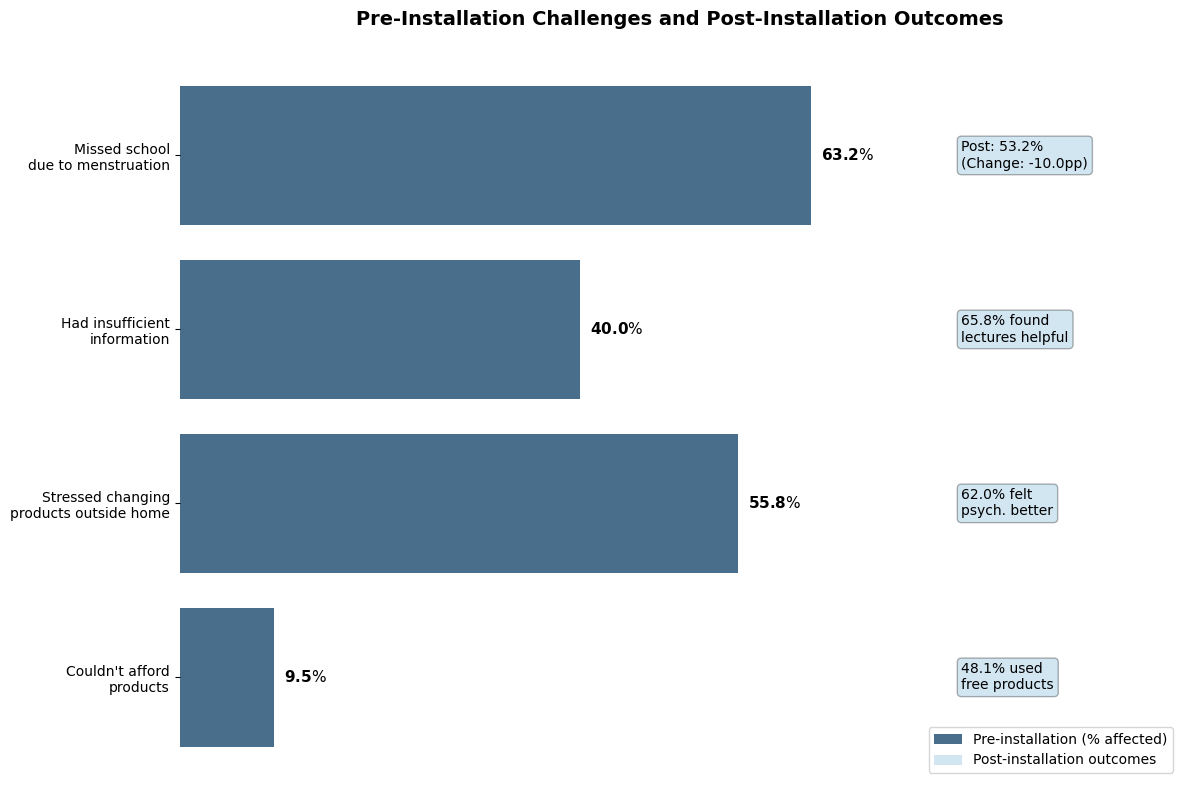

In [17]:
# Final summary visualization
fig, ax = plt.subplots(figsize=(12, 8))

# Key metrics comparison
metrics = [
    'Missed school\ndue to menstruation',
    'Had insufficient\ninformation',
    'Stressed changing\nproducts outside home',
    "Couldn't afford\nproducts"
]

pre_vals = [
    pre_yes,
    (had_partial + had_none) / len(pre_data) * 100,
    (stressed_yes + stressed_sometimes) / len(pre_data) * 100,
    (afford_yes + afford_sometimes) / len(pre_data) * 100
]

# Note: For post values, we show the positive outcomes/improvements
post_outcomes = [
    f'Post: {post_yes:.1f}%\n(Change: {post_yes - pre_yes:+.1f}pp)',
    f'{(lectures_def_yes + lectures_rather_yes)/len(after_data)*100:.1f}% found\nlectures helpful',
    f'{psych_positive:.1f}% felt\npsych. better',
    f'{total_used/len(after_data)*100:.1f}% used\nfree products'
]

y_pos = np.arange(len(metrics))

bars = ax.barh(y_pos, pre_vals, color=PRIMARY_COLOR, alpha=0.8)

# Add pre-values on bars
for i, (bar, val) in enumerate(zip(bars, pre_vals)):
    ax.text(val + 1, i, f'$\\mathbf{{{val:.1f}}}$%', va='center', fontsize=11)

# Add outcome annotations
for i, outcome in enumerate(post_outcomes):
    ax.annotate(outcome, xy=(max(pre_vals) + 15, i), fontsize=10, 
                va='center', ha='left',
                bbox=dict(boxstyle='round,pad=0.3', facecolor=SECONDARY_COLOR, alpha=0.3))

ax.set_yticks(y_pos)
ax.set_yticklabels(metrics)
ax.invert_yaxis()
ax.set_xlim(0, 100)
ax.set_title('Pre-Installation Challenges and Post-Installation Outcomes', fontsize=14, fontweight='bold', pad=20)

# Add legend manually
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor=PRIMARY_COLOR, alpha=0.8, label='Pre-installation (% affected)'),
    Patch(facecolor=SECONDARY_COLOR, alpha=0.3, label='Post-installation outcomes')
]
ax.legend(handles=legend_elements, loc='lower right')

for spine in ax.spines.values():
    spine.set_visible(False)
ax.xaxis.set_visible(False)

plt.tight_layout()
plt.show()